# Wine quality

We imported pandas and numpy

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

we download the file "csv" red wine 

In [5]:
df_red = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";").sort_values('quality')


we want to see our data

In [6]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
899,8.3,1.020,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
459,11.6,0.580,0.66,2.2,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3


In [7]:
df_red.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Linear Regression

Assegning input X and output Y

In [13]:
y = (df_red['quality'].values)
X = df_red.iloc[:,0:-1].values

I chose PCA for graphic reson, in this way we can visualize PC1 against y (quality). PC1 is the linear combination of the 11 features of the matrix X.

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

array([ 0.94657698])

We split our data in training set and test set

In [11]:
from sklearn.model_selection import train_test_split
X_pca_train, X_pca_test, y_train, y_test = \
train_test_split(X_pca, y, test_size=0.3, random_state=0)


We use Linear regression from sklearn.linear_model for estimating the slope of the linear regression

In [19]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression ()
slr.fit(X_pca_train, y_train)
print('Intercept: %.3f' % slr.intercept_)
print('slope: %.3f' % slr.coef_[0])

Intercept: 5.638
slope: -0.004


The code for plotting the linear regression

In [22]:

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red')
    return None

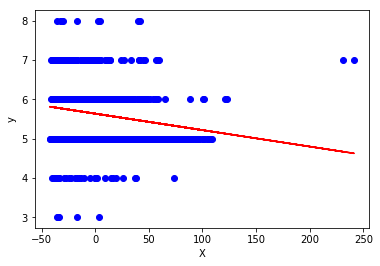

In [23]:

lin_regplot(X_pca_train,y_train, slr)
plt.xlabel('X')
plt.ylabel('y')
plt.show()


We want to evaluete the goodness of fit of our model, and its ability to predict (y).

In [25]:

y_train_pred = slr.predict (X_pca_train)
y_test_pred = slr.predict (X_pca_test)

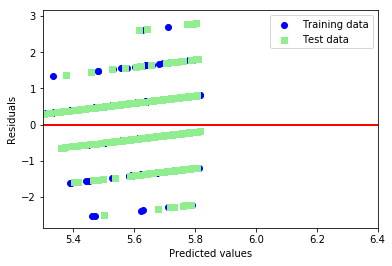

In [26]:
plt.scatter(y_train_pred, y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
            c='lightgreen', marker = 's', label= 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=5.3, xmax=6.4, lw=2, color='red')
plt.xlim([5.3, 6.4])
plt.show()

In [27]:

from sklearn.metrics import mean_squared_error
print('MSE train: %0.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MSE train: 0.602, test: 0.697


# Logistic Regression

We set y as a 'qualitative value' in particular y>6 implies  'True = good', otherwise 'False = bad'

In [70]:
y = (df_red['quality'].values >= 6)

Now we can consider two PCs from X

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

array([ 0.94657698,  0.0483683 ])

We plot our data 

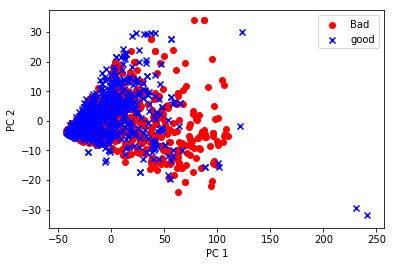

In [72]:
plt.scatter(X_pca[:743, 0], X_pca[:743, 1],
            color='red', marker='o', label='Bad')
plt.scatter(X_pca[744:1598, 0], X_pca[744:1598, 1],
            color='blue', marker='x', label='good')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='upper right')
plt.show()


We split our data in training set and test sat

In [73]:

from sklearn.model_selection import train_test_split
X_pca_train, X_pca_test, y_train, y_test = \
train_test_split(X_pca, y, test_size=0.3, random_state=0)


Now we Normalize our data

In [74]:
stdsc = StandardScaler()
X_pca_train_std = stdsc.fit_transform(X_pca_train)
X_pca_test_std = stdsc.transform(X_pca_test)

run the logistic regression from sklearn.linear_model

In [75]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_pca_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [76]:
lr.predict_proba (X_pca_test_std)

array([[ 0.44099389,  0.55900611],
       [ 0.38813725,  0.61186275],
       [ 0.37032032,  0.62967968],
       [ 0.47493665,  0.52506335],
       [ 0.37554141,  0.62445859],
       [ 0.42973361,  0.57026639],
       [ 0.8105884 ,  0.1894116 ],
       [ 0.48956117,  0.51043883],
       [ 0.40103652,  0.59896348],
       [ 0.5656651 ,  0.4343349 ],
       [ 0.62380076,  0.37619924],
       [ 0.337258  ,  0.662742  ],
       [ 0.35616983,  0.64383017],
       [ 0.44449502,  0.55550498],
       [ 0.35327399,  0.64672601],
       [ 0.45996008,  0.54003992],
       [ 0.35949895,  0.64050105],
       [ 0.44228161,  0.55771839],
       [ 0.41877096,  0.58122904],
       [ 0.4422951 ,  0.5577049 ],
       [ 0.37313754,  0.62686246],
       [ 0.58672129,  0.41327871],
       [ 0.44193011,  0.55806989],
       [ 0.71824506,  0.28175494],
       [ 0.78431553,  0.21568447],
       [ 0.41236061,  0.58763939],
       [ 0.49014522,  0.50985478],
       [ 0.38533629,  0.61466371],
       [ 0.41746402,

In [77]:
X_pca_combined_std = np.vstack((X_pca_train_std, X_pca_test_std))
y_combined = np.hstack((y_train, y_test))

We want to plot the decision regions using the Logistic regression classifier

In [78]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())


    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

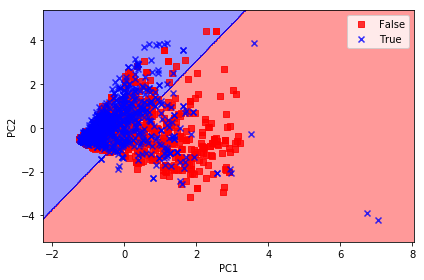

In [80]:
    
plot_decision_regions(X_pca_combined_std, y_combined, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper right')

plt.tight_layout()

plt.show()




# SVM


We use SVC from sklearn.svm as a classifier for our y variable, with linear kernel

In [81]:
from sklearn.svm import SVC
svm= SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_pca_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

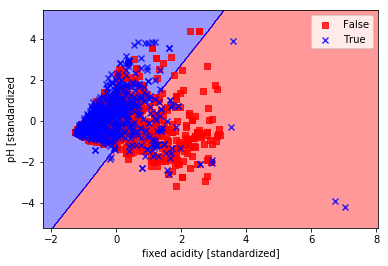

In [82]:
plot_decision_regions(X_pca_combined_std,
                      y_combined, classifier= svm)
plt.xlabel('fixed acidity [standardized]')
plt.ylabel('pH [standardized')
plt.legend(loc='upper right')
plt.show()

In this case we use Radial basis function as kernel

In [87]:
svm1= SVC(kernel='rbf', gamma = 1.1, C=10.0, random_state=0)
svm1.fit(X_pca_train_std, y_train)


SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

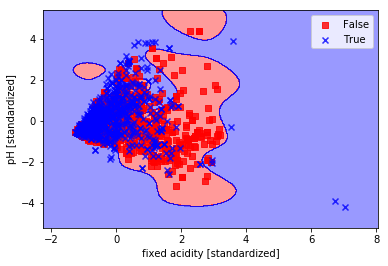

In [89]:
plot_decision_regions(X_pca_combined_std,
                      y_combined, classifier= svm1)
plt.xlabel('fixed acidity [standardized]')
plt.ylabel('pH [standardized]')
plt.legend(loc='upper right')
plt.show()


# KNN neighbours


WE performe Knn neighbours as classifier.

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_pca_train_std, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

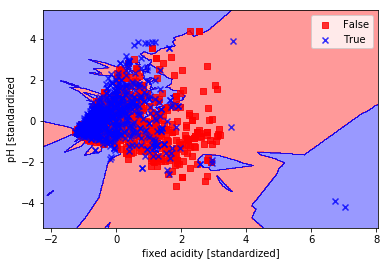

In [86]:
plot_decision_regions(X_pca_combined_std, y_combined, classifier=knn)
plt.xlabel('fixed acidity [standardized]')
plt.ylabel('pH [standardized')
plt.legend(loc='upper right')
plt.show()
